## Task 2: Predict Future Stock Prices (Short-Term)

## Problem Statement

## The objective of this project is to:

Fetch historical stock data using yfinance

Use features such as Open, High, Low, Volume

Predict the next day's closing price

Train a regression model (Linear Regression / Random Forest)

Visualize Actual vs Predicted closing prices

Evaluate model performance

We will use Apple (AAPL) as an example.

## Import Required Libraries

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Data fetching
import yfinance as yf

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")
%matplotlib inline


## Load Historical Stock Data

## We fetch 3 years of historical data.

In [16]:
# Select stock ticker
ticker = "AAPL"

# Download data
df = yf.download(ticker, start="2021-01-01", end="2024-01-01")

# Display first rows
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-04,125.856689,129.941364,123.279451,129.853838,143301900
2021-01-05,127.412735,128.122701,124.903575,125.350950,97664900
2021-01-06,123.123840,127.451658,122.909880,124.213090,155088000
2021-01-07,127.325211,128.015722,124.349234,124.835505,109578200
2021-01-08,128.424194,128.988271,126.654160,128.793750,105158200


## Data Inspection

In [17]:
# Shape of Dataset
print("Dataset Shape:", df.shape)

# Column Names
print("\n\n\nColumn Names:")
print(df.columns)

# Dataset Info
print("\n\n\nDataset Info:")
df.info()

# Summary Statistics
print("\n\n\nSummary Statistics:")
df.describe()

Dataset Shape: (753, 5)



Column Names:
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2021-01-04 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   753 non-null    float64
 1   (High, AAPL)    753 non-null    float64
 2   (Low, AAPL)     753 non-null    float64
 3   (Open, AAPL)    753 non-null    float64
 4   (Volume, AAPL)  753 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.3 KB



Summary Statistics:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,153.253532,154.803962,151.543914,153.105521,7.926109e+07
std,20.070896,20.026777,20.085727,20.041430,2.786190e+07
min,113.334122,117.269056,113.188021,115.934688,2.404830e+07
25%,138.941940,140.586822,136.619138,138.882836,5.849910e+07
50%,150.133194,151.868633,148.262447,149.947689,7.460200e+07
75%,169.847427,171.140508,168.317419,169.326172,9.261200e+07
max,196.073120,197.567590,194.974489,195.984049,1.954327e+08


## Data Visualization (EDA)
##  Closing Price Trend

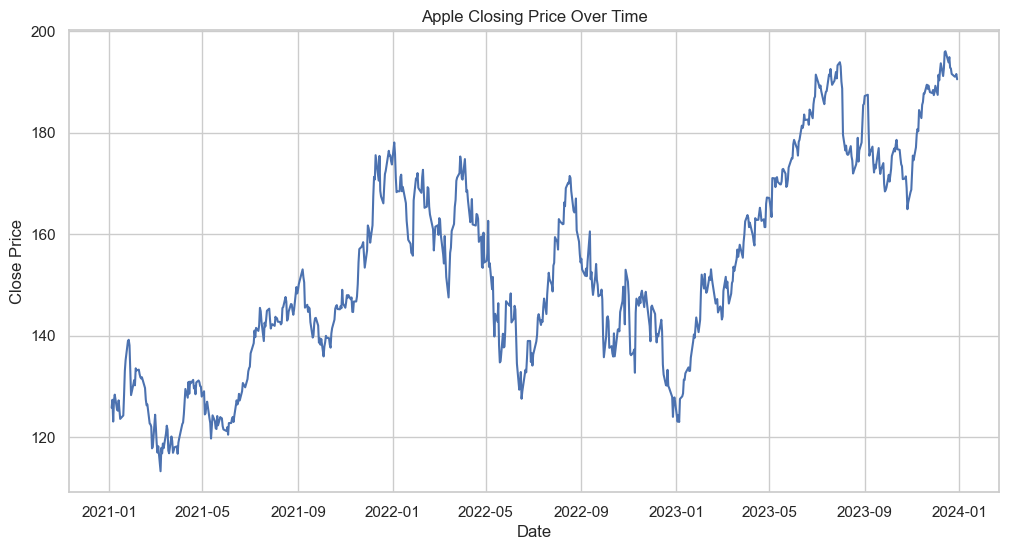

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title("Apple Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

## Data Preprocessing
## Create Target Variable (Next Day Close)
## We shift the Close column upward by 1 day.

In [19]:
df["Target"] = df["Close"].shift(-1)

# Drop last row (NaN target)
df = df.dropna()

## Select Features

In [20]:
features = ["Open", "High", "Low", "Volume"]
X = df[features]
y = df["Target"]

## Train-Test Split (Time Series Aware)

## We DO NOT shuffle time series data.

In [21]:
split_index = int(len(df) * 0.8)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

## Model Training
## Linear Regression

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Perdiction

In [24]:
lr_pred = lr_model.predict(X_test)

## Model Evaluation
We evaluate using:
## MAE (Mean Absolute Error)
## RMSE (Root Mean Squared Error)
## R² Score

In [29]:
def evaluate_model(true, predicted):
    print("MAE:", mean_absolute_error(true, predicted))
    print("RMSE:", np.sqrt(mean_squared_error(true, predicted)))
    print("R2 Score:", r2_score(true, predicted))

print("Linear Regression Performance:")
evaluate_model(y_test, lr_pred)

Linear Regression Performance:
MAE: 1.799906389655249
RMSE: 2.34908432159218
R2 Score: 0.9127915927020933


## Plot Actual vs Predicted Prices
##  Linear Regression Plot

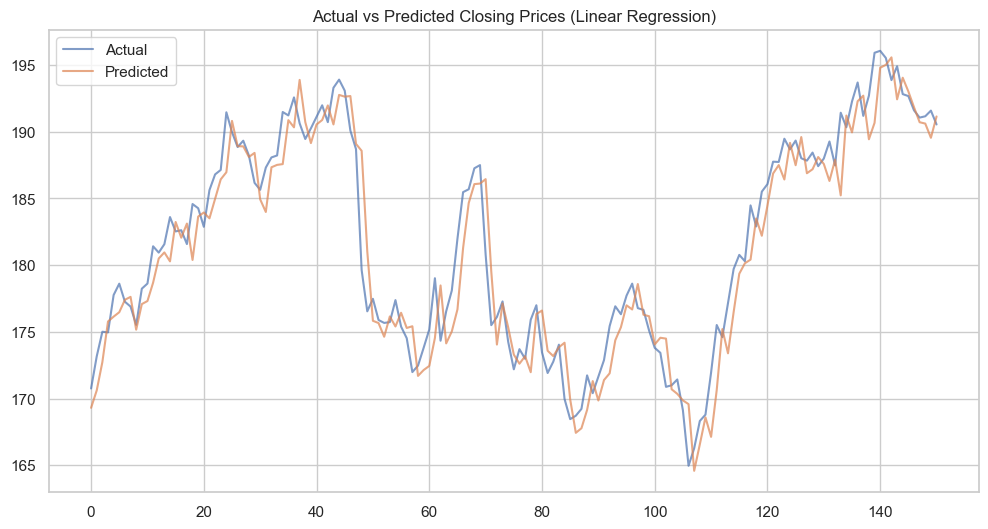

In [30]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(lr_pred, label="Predicted", alpha=0.7)
plt.title("Actual vs Predicted Closing Prices (Linear Regression)")
plt.legend()
plt.show()


## Skills Demonstrated

Fetching financial data using yfinance API

Time series data handling

Creating shifted target variables

Training regression models

Model evaluation (MAE, RMSE, R²)

Visualizing predictions vs actual prices

## Just Looking

In [33]:
import yfinance as yf

data = yf.Ticker("AAPL")
print(data.history(period="5d"))


                                 Open        High         Low       Close  \
Date                                                                        
2026-02-11 00:00:00-05:00  274.700012  280.179993  274.450012  275.500000   
2026-02-12 00:00:00-05:00  275.589996  275.720001  260.179993  261.730011   
2026-02-13 00:00:00-05:00  262.010010  262.230011  255.449997  255.779999   
2026-02-17 00:00:00-05:00  258.049988  266.290009  255.539993  263.880005   
2026-02-18 00:00:00-05:00  263.600006  266.820007  262.450012  264.350006   

                             Volume  Dividends  Stock Splits  
Date                                                          
2026-02-11 00:00:00-05:00  51931300        0.0           0.0  
2026-02-12 00:00:00-05:00  81077200        0.0           0.0  
2026-02-13 00:00:00-05:00  56290700        0.0           0.0  
2026-02-17 00:00:00-05:00  58469100        0.0           0.0  
2026-02-18 00:00:00-05:00  34129600        0.0           0.0  
